![banner](../banner.jpg)

***[Workshop 6](about) - Training course in data analysis for genomic surveillance of African malaria vectors***

---

# Module 1 - Haplotypes

**Theme: Data**

In previous workshops we have analysed data on individual genetic variations, such as single nucleotide polymorphisms. This module introduces a new type of genetic variation data called "haplotypes". The benefit of haplotype data is that it conveys the **combinations of mutations** that occur together on the same segment of a DNA sequence. This in turn allows us to study how those DNA sequences are inherited and transmitted between generations. Many novel and powerful methods of analysis are possible with haplotype data, including analyses to detect genome regions under strong positive selection, which we will study in the subsequent modules of this workshop.

## Learning objectives

At the end of this module you will be able to:

* Explain what haplotypes are.
* Explain why haplotypes are useful for vector genomic surveillance.
* Explain how haplotypes are inferred from genotype data (phasing).
* Access haplotype data from MalariaGEN and explain how the data are stored.


## Lecture

### English

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ifk0U0VrHjk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Français

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/hcMtMofWxtI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Please note that the code in the cells below might differ from that shown in the video. This can happen because Python packages and their dependencies change due to updates, necessitating tweaks to the code.

## What are haplotypes?

Please see the lecture videos for an explanation of what haplotypes are, why they are useful, and how we infer haplotypes from next-generation sequence data.

## Accessing MalariaGEN haplotype data

MalariaGEN routinely generates haplotype data from whole-genome sequencing of *Anopheles* mosquitoes. These data can be accessed as follows.

### Setup

In [4]:
!pip install -q --no-warn-conflicts malariagen_data

In [5]:
import malariagen_data

In [6]:
ag3 = malariagen_data.Ag3()
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : None
Cohorts analysis        : 20230516
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.12.0
Client location         : unknown
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

Haplotype data can be accessed via the `haplotypes()` function. Let's look at the function documentation.

In [7]:
ag3.haplotypes?

Signature:
ag3.haplotypes(
    region: Union[str, malariagen_data.util.Region, Mapping, List[Union[str, malariagen_data.util.Region, Mapping]], Tuple[Union[str, malariagen_data.util.Region, Mapping], ...]],
    analysis: str = 'default',
    sample_sets: Union[Sequence[str], str, NoneType] = None,
    sample_query: Optional[str] = None,
    inline_array: bool = True,
    chunks: Union[str, Tuple[int, ...]] = 'native',
    cohort_size: Optional[int] = None,
    min_cohort_size: Optional[int] = None,
    max_cohort_size: Optional[int] = None,
    random_seed: int = 42,
) -> xarray.core.dataset.Dataset
Docstring:
Access haplotype data.

Parameters
----------
region : str or Region or Mapping or list of str or Region or Mapping or tuple of str or Region or Mapping
    Region of the reference genome. Can be a contig name, region string
    (formatted like "{contig}:{start}-{end}"), or identifier of a genome
    feature such as a gene or transcript. Can also be a sequence (e.g.,
    list) of

Let's demonstrate this function, accessing haplotype data for a small genome region on chromosome arm 2L from position 2,422,600 to 2,422,700. To keep things simple we'll also only access haplotypes from 20 randomly chosen samples from Cameroon. This function returns an [xarray dataset](../workshop-5/module-1-xarray).

In [8]:
ds_haps = ag3.haplotypes(
    region="2L:2,422,600-2,422,700",
    analysis="gamb_colu_arab",
    sample_query="country == 'Cameroon'",
    cohort_size=20,
)
ds_haps

<xarray.Dataset>
Dimensions:           (variants: 26, alleles: 2, samples: 20, ploidy: 2)
Coordinates:
    variant_position  (variants) int32 dask.array<chunksize=(26,), meta=np.ndarray>
    variant_contig    (variants) uint8 dask.array<chunksize=(26,), meta=np.ndarray>
    sample_id         (samples) object dask.array<chunksize=(11,), meta=np.ndarray>
Dimensions without coordinates: variants, alleles, samples, ploidy
Data variables:
    variant_allele    (variants, alleles) |S1 dask.array<chunksize=(26, 1), meta=np.ndarray>
    call_genotype     (variants, samples, ploidy) int8 dask.array<chunksize=(26, 3, 2), meta=np.ndarray>
Attributes:
    contigs:   ('2R', '2L', '3R', '3L', 'X')
    analysis:  gamb_colu_arab

There are 20 samples and thus 40 haplotypes in this dataset. We also have data for 26 variants (SNPs).

In [9]:
n_samples = ds_haps.dims["samples"]
n_samples

20

In [10]:
n_haps = n_samples * 2
n_haps

40

In [11]:
n_variants = ds_haps.dims["variants"]
n_variants

26

The "variant_position" array has data on the genomic coordinates of the SNPs.

In [12]:
pos = ds_haps["variant_position"].values
pos

array([2422601, 2422606, 2422609, 2422610, 2422611, 2422613, 2422617,
       2422621, 2422625, 2422629, 2422630, 2422634, 2422643, 2422645,
       2422651, 2422652, 2422666, 2422678, 2422680, 2422683, 2422685,
       2422687, 2422688, 2422691, 2422695, 2422697], dtype=int32)

The "variant_allele" array has the reference and alternate alleles for the SNPs.

In [13]:
alleles = ds_haps["variant_allele"].values
alleles

array([[b'T', b'A'],
       [b'T', b'G'],
       [b'C', b'T'],
       [b'C', b'A'],
       [b'T', b'A'],
       [b'C', b'T'],
       [b'C', b'A'],
       [b'T', b'G'],
       [b'C', b'A'],
       [b'G', b'A'],
       [b'C', b'A'],
       [b'T', b'C'],
       [b'A', b'G'],
       [b'G', b'A'],
       [b'T', b'C'],
       [b'A', b'T'],
       [b'C', b'T'],
       [b'G', b'T'],
       [b'C', b'G'],
       [b'A', b'C'],
       [b'A', b'G'],
       [b'C', b'A'],
       [b'G', b'T'],
       [b'T', b'A'],
       [b'C', b'T'],
       [b'T', b'A']], dtype='|S1')

In [14]:
ref = alleles[:, 0]
ref

array([b'T', b'T', b'C', b'C', b'T', b'C', b'C', b'T', b'C', b'G', b'C',
       b'T', b'A', b'G', b'T', b'A', b'C', b'G', b'C', b'A', b'A', b'C',
       b'G', b'T', b'C', b'T'], dtype='|S1')

In [15]:
alt = alleles[:, 1]
alt

array([b'A', b'G', b'T', b'A', b'A', b'T', b'A', b'G', b'A', b'A', b'A',
       b'C', b'G', b'A', b'C', b'T', b'T', b'T', b'G', b'C', b'G', b'A',
       b'T', b'A', b'T', b'A'], dtype='|S1')

The haplotypes themselves are stored in the "call_genotype" array. The shape of this array is (number of variants, number of samples, number of haplotypes per sample).

In [16]:
gt = ds_haps["call_genotype"].values
gt.shape

(26, 20, 2)

This array uses the numeric encoding for the alleles. We can see that by inspecting its dtype and also inspecting the data values.

In [17]:
gt.dtype

dtype('int8')

In [18]:
gt

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=int8)

The basic numpy representation of this array is a bit hard to understand, so to help build our intuition of this data structure let's make a simple plotting function to visualise haplotypes.

In [19]:
def plot_haplotypes(
    ds,
    hide_text=False,
    hide_non_seg=False,
):
    import plotly.express as px
    import allel

    # convert to 2D array of haplotypes
    pos = ds["variant_position"].values
    gt = ds["call_genotype"].values
    ht = gt.reshape(gt.shape[0], -1)

    # size rows and columns
    if hide_text:
        # can make smaller because text not shown
        row_height = 8
        col_width = 5
    else:
        # make a bit bigger so we can see the text
        row_height = 14
        col_width = 12

    # deal with non-segregating sites
    if hide_non_seg:
        ac = allel.HaplotypeArray(ht).count_alleles(max_allele=1)
        loc_seg = ac.is_segregating()
        ht = ht[loc_seg]

    # plot a heatmap
    fig = px.imshow(
        ht.T,
        text_auto=not hide_text,
        labels=dict(
            x="Variants",
            y="Haplotypes",
        ),
        width=ht.shape[0] * col_width + 200,
        height=ht.shape[1] * row_height + 200,
        zmin=0,
        zmax=0,
        color_continuous_scale="greys",
        template="simple_white",
        aspect="auto"
    )

    # visual styling
    fig.update_layout(
        coloraxis_showscale=False,
        plot_bgcolor="#cccccc",
    )
    fig.update_traces(xgap=0, ygap=1)
    fig.update_xaxes(tickvals=[])
    fig.update_yaxes(tickvals=[])

    return fig

This function will visualise haplotypes as a heatmap, with haplotypes as rows and variants as columns. A reference allele has a white background, and an alternate allele has a black background.

Let's use the function to visualise the haplotypes we accessed above.

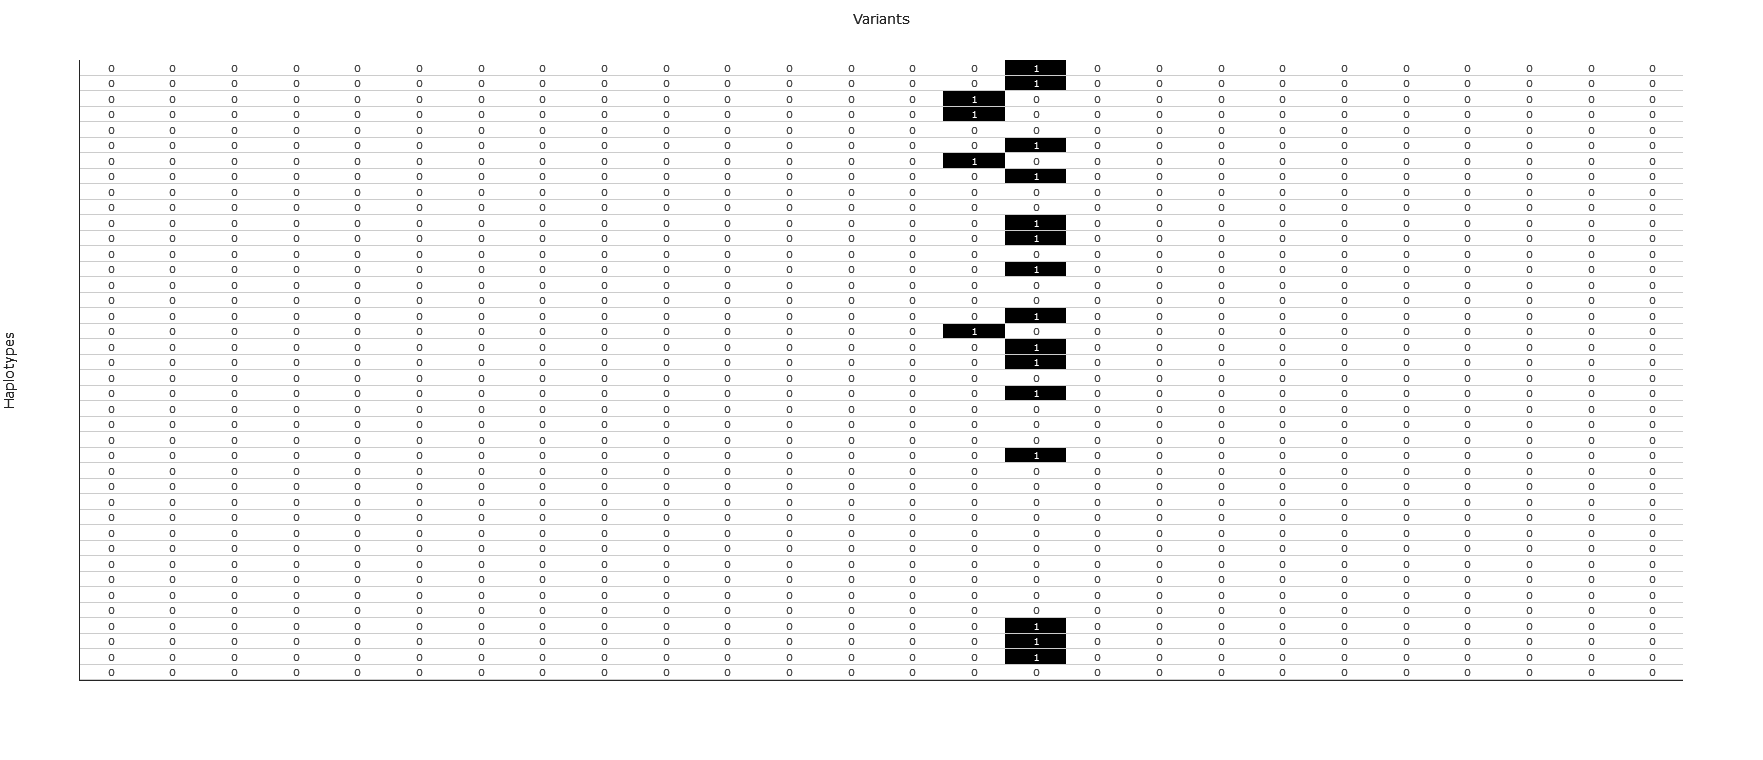

In [20]:
plot_haplotypes(ds_haps)

In this set of haplotype data we can see there are only two variants which are segregating in this set of samples. All the other variants are non-segregating, which means all haplotypes carry the same allele (in this case a "0" meaning the reference allele).

The non-segregating variants are not particularly informative, so let's hide them.

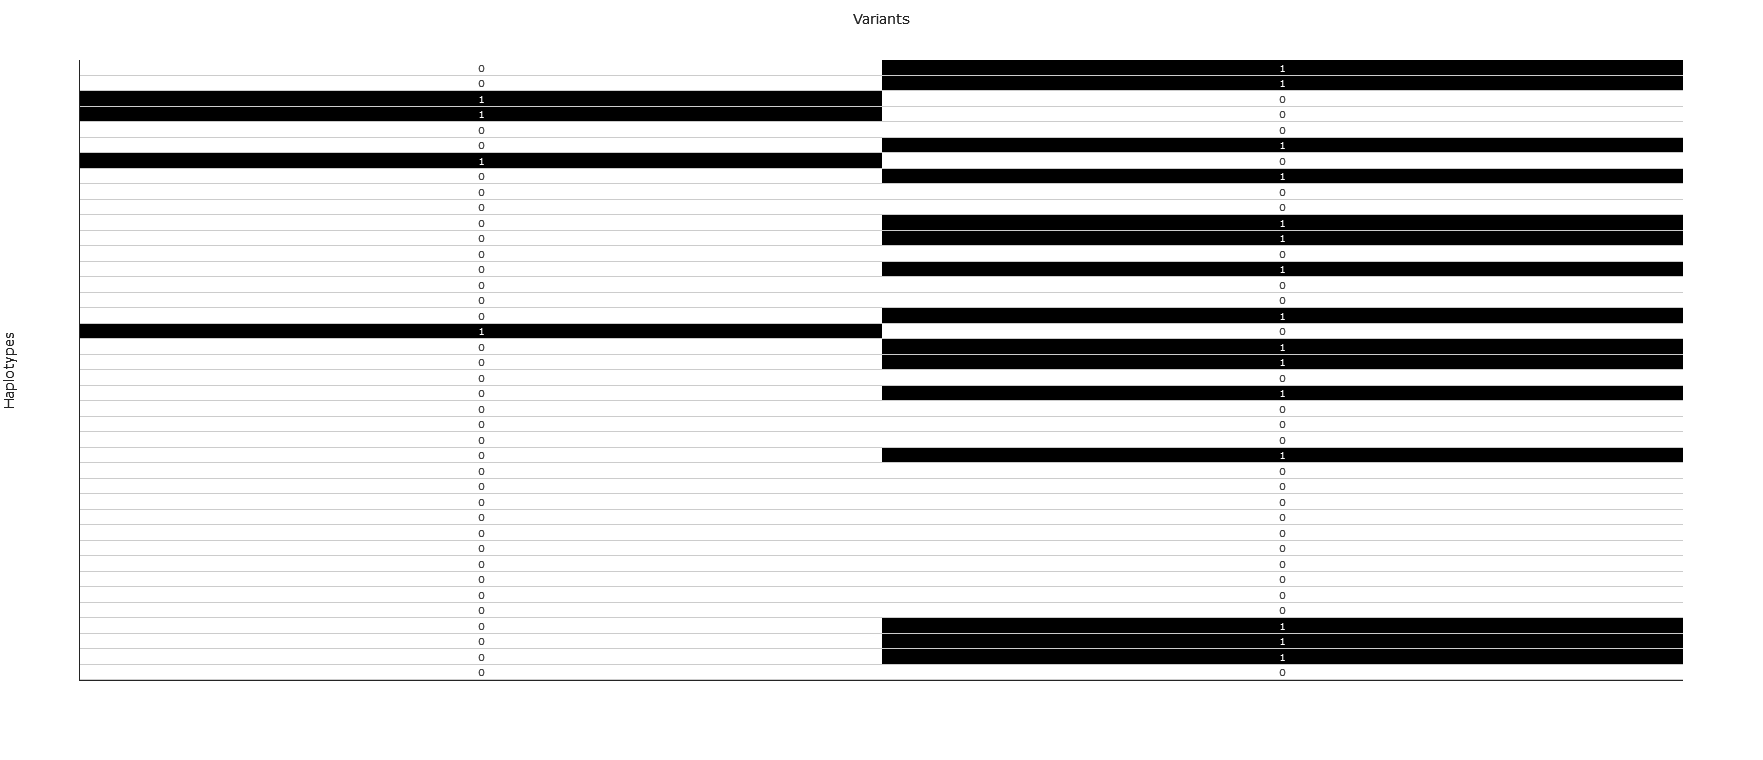

In [21]:
plot_haplotypes(ds_haps, hide_non_seg=True)

We can see now that within this genome region, and within this set of 20 samples, we have two segregating sites and three unique haplotypes.

## Well done!

Hopefully this module has been a useful introduction to haplotype data. There are no practical exercises for this module, but you might like to launch this notebook for yourself, and try running the code examples above, or changing them to load data from a different genome region or a different set of samples.